## Keras 소개
* keras.io
* 동일한 코드로 CPU와 GPU 호환
* 쉬운 API, 빠른 프로토타입핑 지원
* CNN, RNN 지원 및 조합 가능
* GAN, Neural Turing Machine 까지 어떤 딥러닝 모델에도 적합
* MIT 라이센스, 상업적 자유
* Python 2, 3 호환
* 구글, 넷플릭스, 우버, 썬(CERN), 엘프, 스퀘어 등에서 활용
* Kaggle에서도 인기

###  케라스, 텐서플로, 씨아노, CNTK
* 고수준 모델 라이브러리
* 미분 따위 저수준 지원 안해
    * 백엔드 엔진에게 위임
        * 현재는 텐서플로, 씨아노, CNTK 3개만 지원, apache MXNet 추가 예정
    * 코드 변경 없이 백엔드 교체 가능
    * 텐서플로 기본 셋팅
        * 텐서플로 텐서 연산 라이브러리
            * CPU : Eigen(eigen.tuxfamily.org
            * GPU : NVIDIA CUDA cuDNN(심층 신경망 라이브러리)


## 신경망 구조
* Neural Nework 생성 결정 요소
    * 층(Layer) 갯수
    * 입력 / 출력 갯수
    * 손실함수 선택
    * 옵티마이저 선택
    
### 층(Layer)
* keras.layers 에 종류별 클래스
    * 가장 일반적인 완전연결층(밀집층)
        * Dense 클래스로 표현
    * 시계열이나 시퀀스는 3D로 텐서로 표현
        RNN, LSTM
    * 이미지는 4D로 저장되고 CNN
        * Conv2D 클래스
* 생성할때 출력층은 필수고 입력 층은 input_shape 인자로 넘기는데, 샘플 축은 생략
    * 예를 들어 `Dense(32, input_shape=(784,))` 이면 입력이 n x 784, 이때 n은 몇개든 상관없슴
    * 만약 `Dense(10)` 이렇게 입력층 생략하면 앞 층의 출력의 갯수로 자동 지정
    

In [1]:
from keras import layers
dir(layers)

Using TensorFlow backend.


['Activation',
 'ActivityRegularization',
 'Add',
 'AlphaDropout',
 'AtrousConv1D',
 'AtrousConv2D',
 'AtrousConvolution1D',
 'AtrousConvolution2D',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BatchNormalization',
 'Bidirectional',
 'Concatenate',
 'Conv1D',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM2D',
 'ConvLSTM2DCell',
 'ConvRNN2D',
 'ConvRecurrent2D',
 'Convolution1D',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'CuDNNGRU',
 'CuDNNLSTM',
 'Deconv2D',
 'Deconv3D',
 'Deconvolution2D',
 'Deconvolution3D',
 'Dense',
 'DepthwiseConv2D',
 'Dot',
 'Dropout',
 'ELU',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GlobalAveragePooling1D',
 'GlobalAveragePooling2D',
 'GlobalAveragePooling3D',
 'GlobalAvgPool1D',
 'GlobalAvgPool2D',
 'GlobalAvgPool3D',
 'GlobalMaxPool1D',
 'GlobalMaxPoo

### 네트워크(network)
* 층을 어떻게 연결할지 결정하는 것
* 나무로 치면 가지들의 모양
* 가장 일반적인 것이 DAG(Directed Acyclic Graph, 비순환 유향 그래프: 일정한 방향이 있고 다시 돌아오는게 없는 그래프)
* 가설공간을 결정하는 작업
    * 아마도 Wx1 + Wx2 + .... Wxn을 얼마나 해야 하는지 결정
* 어떤 모양을 만들어야 하는지 알아 내는건 과학보다 예술에 가깝다.

### 손실함수와 옵티마이저
* 주요 내용
    * 손실함수 : 최소화 해야 할 값. 성공지표
    * 옵티마이저 : 손실함수로 업데이트할 방법 결정, 역전파 알고리즘 구현한것,  SGD
* 손실함수는 각층마다 있지만, 옵티마이저는 네트워크에 단 1개
* 손실함수 잘못 선택하면 생기는 일
    * 평균 인류 행복 지수 최대화 --> 불행한 사람 죽임
* 손실함수 선택  지침
    * 2개 클래스 : binary crossentropy
    * 여러 클래스 분류 : categorical crossentropy
    * 회귀 : 평균제곱오차(MSE)
    * 시퀀스 : CTC(connection Temporal Classification)

       

# 영화리뷰 분류 예제
### IMDB 데이터셋
* Dataset
    * IMDB : Internet Movie DataBase
    * train 25천개, test : 25천개
    * 각각 긍정 부정 50%씩
    * 리뷰 데이타는 단어를 숫자 시퀀스로 이미 변환
    * 용량 17MB
    * keras.datasets.imdb
        * load_data(num_words=100000) : 빈도 높은 1만 단어만 사용
        * data : 리뷰에 포함된 단어의 인덱스 값들, max:9999
            * 각 샘플은 python list 타입, 길이가 제 각각이라서
        * label : 0-부정, 1-긍정


* 훈련 세트와 검증(validation)셋트로 나눠서 fit()함수 호출 이때 `validation_data` 인자 사용
    * `history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))`
    * 이렇게 하면 `history` 디셔넉리가 'acc', 'loss', 'val_acc', 'val_loss' 4개의 키로 된 결과를 갖는다.
        *  훈련 정확도와 손실, 검증 정확도와 손실 값이다.
    * plot으로 각 에포크당 훈련결과와 검증 결과를 비교할 수 있다.
        * ```
        plt.plot(epochs, loss, 'bo', label='training loss')
        plt.plot(epochs, val_loss, 'b', label='validation loss')
        ```
    * 이걸 보면 어느 에폭에서 과대 적합이 시작되었는지 알 수 있다. 그 에폭과 전체 훈련 셋으로 다시 훈련 시킨다.

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다
word_index = imdb.get_word_index()
# 정수 인덱스와 단어를 매핑하도록 뒤집습니다
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 리뷰를 디코딩합니다. 
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

In [9]:

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 신경망 만들기

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [15]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 337us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8685
Epoch 2/20
15000/15000 [==============================] - 3s 183us/step - loss: 0.3004 - acc: 0.9045 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.2179 - acc: 0.9286 - val_loss: 0.3085 - val_acc: 0.8712
Epoch 4/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.1751 - acc: 0.9437 - val_loss: 0.2841 - val_acc: 0.8833
Epoch 5/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8871
Epoch 6/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.1150 - acc: 0.9651 - val_loss: 0.3166 - val_acc: 0.8771
Epoch 7/20
15000/15000 [==============================] - 2s 121us/step - 

In [18]:

history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 3s 107us/step - loss: 0.4750 - acc: 0.8211
Epoch 2/4
25000/25000 [==============================] - 2s 92us/step - loss: 0.2647 - acc: 0.9098
Epoch 3/4
25000/25000 [==============================] - 2s 81us/step - loss: 0.1984 - acc: 0.9305
Epoch 4/4
25000/25000 [==============================] - 5s 202us/step


In [20]:
model.predict(x_test)

array([[0.13381013],
       [0.9996893 ],
       [0.30844456],
       ...,
       [0.07031968],
       [0.04384047],
       [0.4529087 ]], dtype=float32)

# 뉴스 기사 분류 예제
* 로이터의 뉴스 기사 데이타
    * 46개 주제 클래스, 클래스당 최소 10개 새플
    * keras.datasets.reuters.load_data(num_words=10000)
    * 훈련셋 : 8,982, 테스트 셋 : 2,246 
        *  기본값 0.2 비율
        * 데이터 형식은 영화 리뷰와 같음.
    * 다중 분류
        * 마지막 층: softmax 사용
            * activation='softmax'
        * 손실함수 : 크로스엔트로피 
            * loss='categorical_crossentropy'
    * 검증데이타 1000개씩 떼서 앞에서 처럼 20 에폭 시도해
        * 9번째 에폭에서 과적합 발견해서 그걸로 훈련 완료
    * 예측
        * prediction = model.prediction(x_test)
        * 결과가 softmax라서 np.argmax(predictions) 사용
            * 그러기 싫으면 에초에 레이블을 원핫 인코딩 하지 말고 정수 데이타 사용
                * compile(loss='sparse_categorical_corssentropy')
    * 중간 히든층이 적으면 잘안된다.

In [21]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(train_data.shape, test_data.shape)

2113536/2110848 [==============================] - 1s 1us/step
(8982,) (2246,)


In [22]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [24]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [25]:
train_labels[10]

3

## 데이터 준비

In [26]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [27]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

In [28]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 모델 구성

In [29]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [30]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 훈련 검증

In [31]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [32]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 222us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 145us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 131us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 134us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 128us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 136us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020


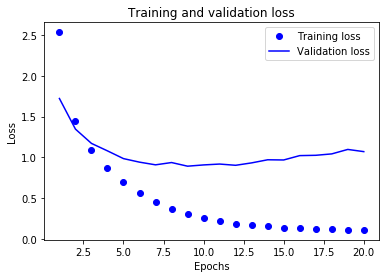

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

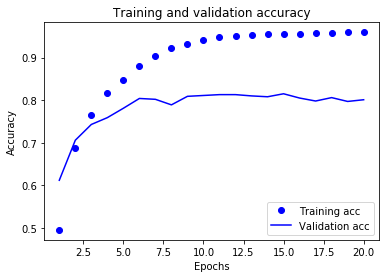

In [35]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

이 모델은 9번째 에포크 이후에 과대적합이 시작됩니다. 9번의 에포크로 새로운 모델을 훈련하고 테스트 세트에서 평가하겠습니다:

In [36]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 189us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 141us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 134us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 136us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 152us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 143us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 135us/step - loss: 0.4124 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

In [37]:

results

[1.0224982713442876, 0.7756010686194165]

# 주택 가격 예측 예제
* keras.datasets.boston_housing.load_data()
* 훈련 404개, 테스트 102개 양이 너무 적어.
    * 특성 :범죄율, 방개수, 고속도로 접근성 등 13가지
* 레이블은 주택가격 천달러 단위
* 숫자 단위가 제각각이니까 표준화 필요
    * ```
    mean = train_data.mean(axis=0)
    train_data -= mean
    std = train_data.std(axis=0)
    train_data/=std
    test_data -= mean
    test_data /= std
    ```
    * 훈련데이타로 표준화 한 값으로 훈련 데이타도 적용
        * 그렇지 안으면 의미가 달라짐
* 회귀문제
    * 마지막 층에 활성화 함수 사용 안함
    * loss = 'mse', metrics=['mae']
* 샘플수가 너무 적어서 k-fold 적용 필요
    * 같은 데이타로 돌아가며 역할 바꿔서 여러번 훈련하고 평가한걸 누적 후 평균
    * 1차 :검증, 훈련, 훈련
    * 2차: 훈련, 검증, 훈련
    * 3차 : 훈련, 훈련, 검증
    * 각 폴드에서 검증 점수 로그에 저장
        * mae_history = history.history['val_mean_absolute_error']
        * all.append(mae_history)

In [38]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()
print(train_data.shape, test_data.shape)

57344/57026 [==============================] - 0s 7us/step
(404, 13) (102, 13)


In [39]:

train_targets[:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

## 데이터 준비

In [40]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

## 모델 구성

In [41]:
from keras import models
from keras import layers

def build_model():
    # 동일한 모델을 여러 번 생성할 것이므로 함수를 만들어 사용합니다
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

## K-fold 

In [42]:

import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # 검증 세트로 모델 평가
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [ ]:

print(all_scores)
print(np.mean(all_scores))

In [44]:
from keras import backend as K

# 메모리 해제
K.clear_session()

In [46]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [43]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

NameError: name 'all_mae_histories' is not defined

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# 새롭게 컴파인된 모델을 얻습니다
model = build_model()
# 전체 데이터로 훈련시킵니다
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score